In [30]:
from sklearn.neighbors import kneighbors_graph
from sklearn import manifold
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy import sparse 
import numpy as np

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

(150, 3)


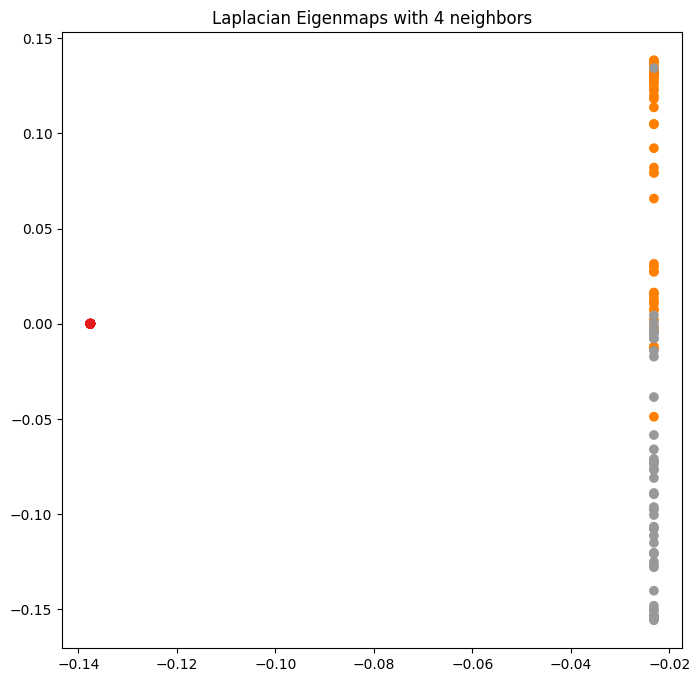

In [47]:

def laplacian_eigenmaps(X,y, n_neighbors=4, n_components=3, normilize=True, i=1, j=2,**kwargs):
    N = X.shape[0]  
    kng = kneighbors_graph(X, n_neighbors, mode='distance')
    W = 0.5 * (kng + kng.T)

    #W = np.where(W > 0, 1, 0)
    D = sparse.diags(np.asarray(W.sum(axis=1)).flatten())

    if normilize:
        title = f"Normalized Laplacian Eigenmaps with {n_neighbors} neighbors"
        Dinv = sparse.linalg.inv(D) 
        Dinv = Dinv.sqrt()
        L = Dinv@( D - W )@Dinv
    else:
        title = f"Laplacian Eigenmaps with {n_neighbors} neighbors"

        L = D - W
    if "visualise_laplacien" in kwargs and kwargs["visualise_laplacien"]:
        plt.figure(figsize=(8,8))
        plt.imshow(L.toarray())
        plt.title("Laplacian")
        plt.colorbar()
        plt.show()

    [yl, YL] = sparse.linalg.eigsh(L, k=n_components, which='SM')
    print(YL.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(YL[:,i], YL[:,j], c=y, cmap=plt.cm.Set1)
    plt.title(title)
    plt.show()



laplacian_eigenmaps(X, y, n_neighbors=4,n_components=3, normilize=False, visualise_laplacien=False)

(150, 3)


/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


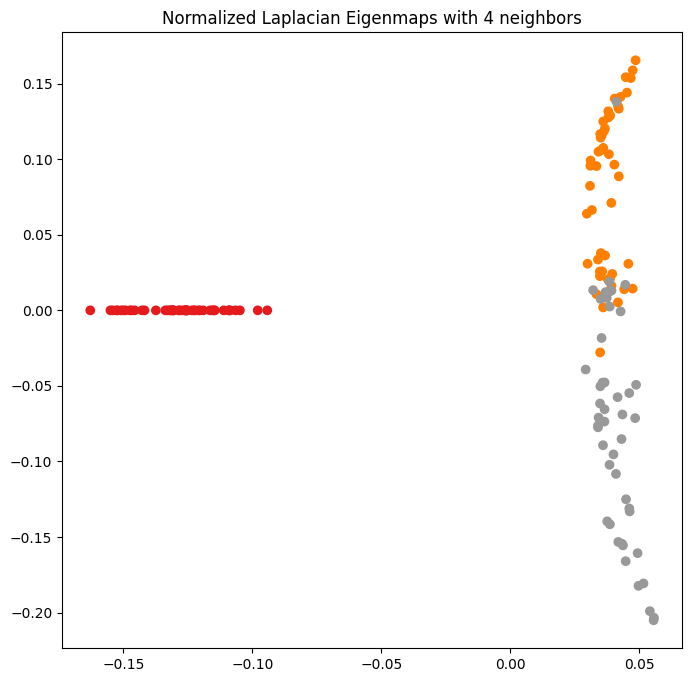

In [49]:
laplacian_eigenmaps(X, y, 4, normilize=True , visualise_laplacien=False)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


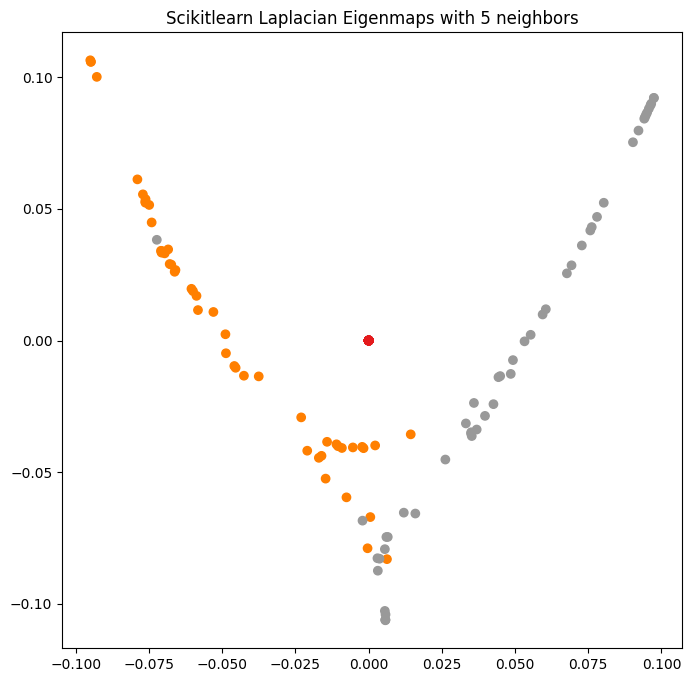

In [50]:
Lap_Eig = manifold.SpectralEmbedding(n_components=3,
                                     affinity='nearest_neighbors',
                                    random_state=0,
                                     n_neighbors=4,
                                      eigen_solver="arpack")

YL = Lap_Eig.fit_transform(X)

plt.figure(figsize=(8,8))
plt.scatter(YL[:,1], YL[:,2], c=y, cmap=plt.cm.Set1)
plt.title(f"Scikitlearn Laplacian Eigenmaps with {5} neighbors")
plt.show()

# 3 vecteur propre 8 voisins

(150, 3)


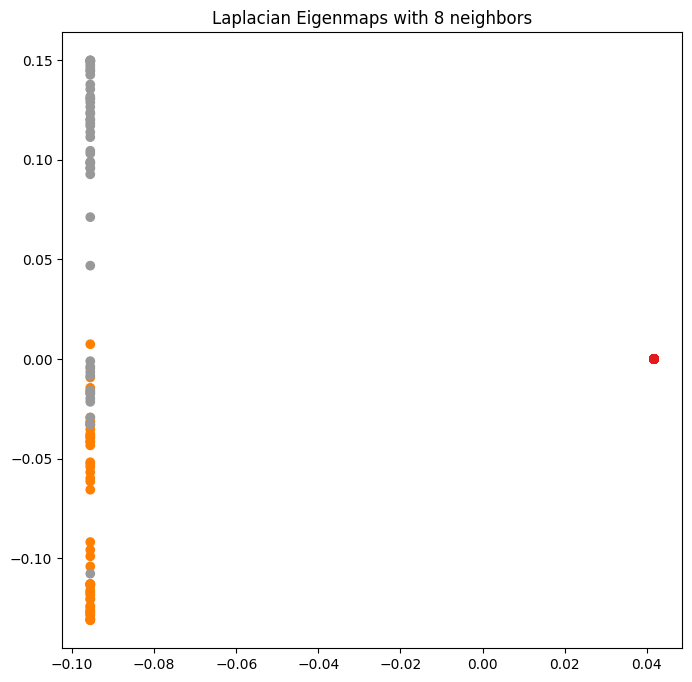

(150, 3)


/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


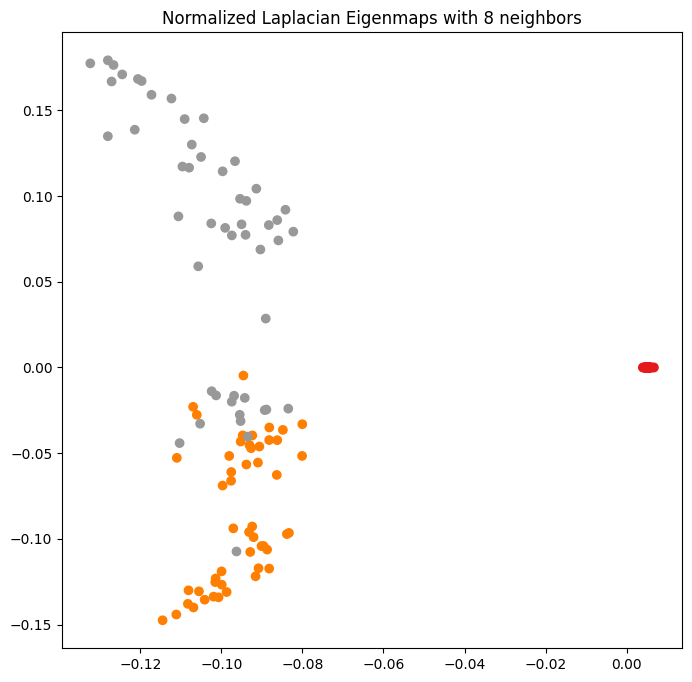

In [53]:
laplacian_eigenmaps(X, y, n_neighbors=8,n_components=3, i=1, j=2, normilize=False , visualise_laplacien=False)
laplacian_eigenmaps(X, y, n_neighbors=8,n_components=3, i=1, j=2, normilize=True , visualise_laplacien=False)


In [ ]:
Lap_Eig = manifold.SpectralEmbedding(n_components=3,
                                     affinity='nearest_neighbors',
                                    random_state=0,
                                     n_neighbors=8,
                                      eigen_solver="arpack")

YL = Lap_Eig.fit_transform(X)

plt.figure(figsize=(8,8))
plt.scatter(YL[:,1], YL[:,2], c=y, cmap=plt.cm.Set1)
plt.title(f"Scikitlearn Laplacian Eigenmaps with {5} neighbors")
plt.show()

(150, 4)


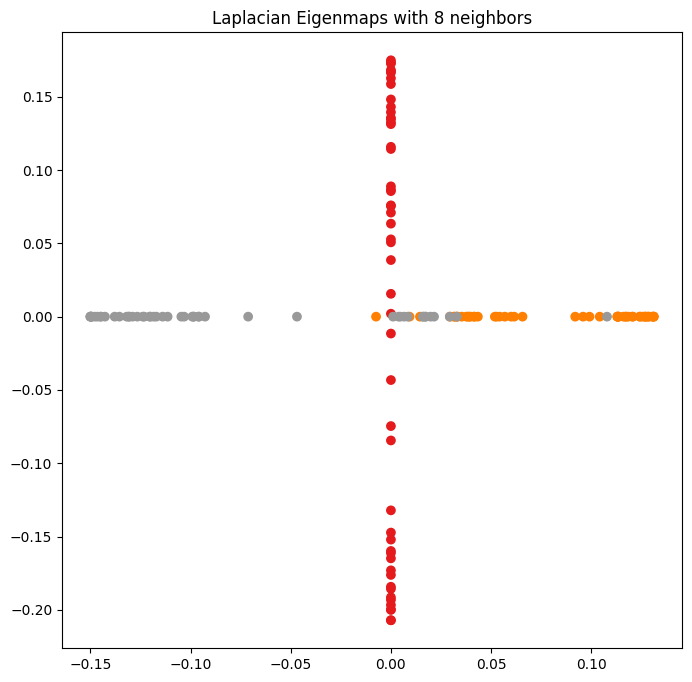

(150, 4)


/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


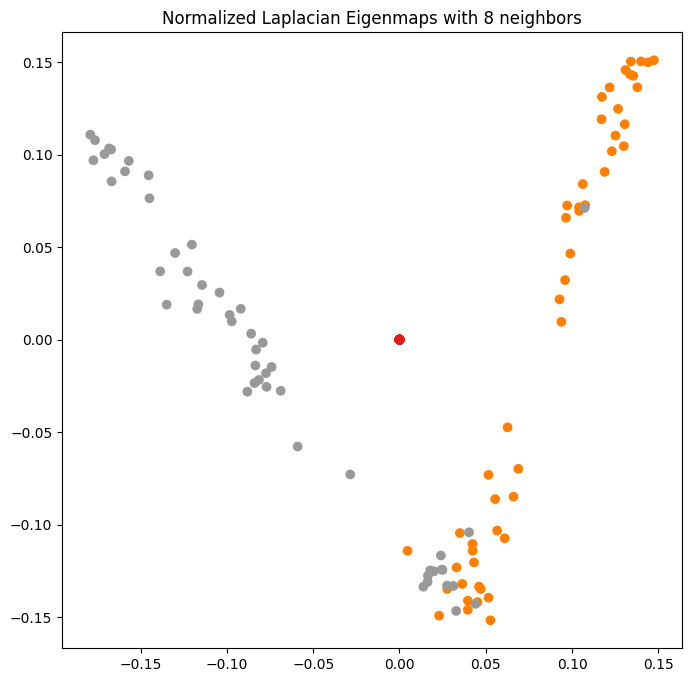

In [54]:
laplacian_eigenmaps(X, y, n_neighbors=8,n_components=4, i=2, j=3, normilize=False , visualise_laplacien=False)
laplacian_eigenmaps(X, y, n_neighbors=8,n_components=4, i=2, j=3, normilize=True , visualise_laplacien=False)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


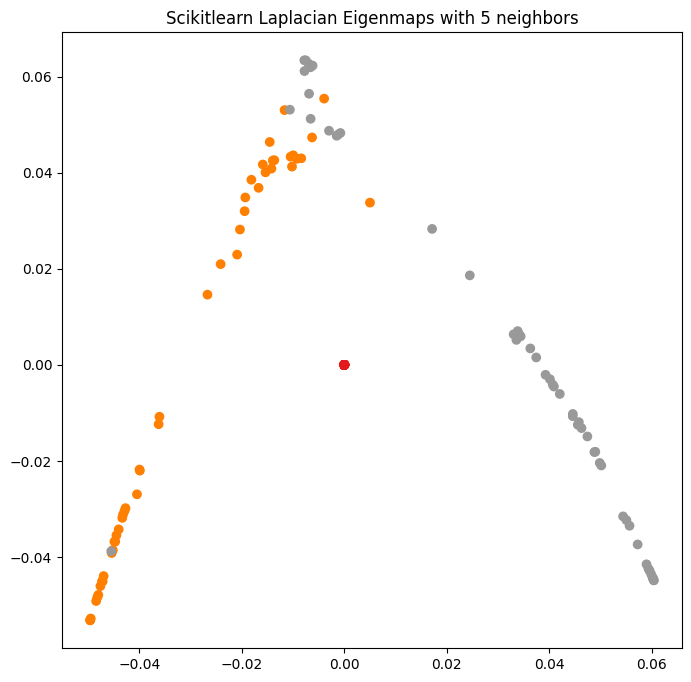

In [55]:
Lap_Eig = manifold.SpectralEmbedding(n_components=3,
                                     affinity='nearest_neighbors',
                                    random_state=0,
                                     n_neighbors=8,
                                      eigen_solver="arpack")

YL = Lap_Eig.fit_transform(X)

plt.figure(figsize=(8,8))
plt.scatter(YL[:,1], YL[:,2], c=y, cmap=plt.cm.Set1)
plt.title(f"Scikitlearn Laplacian Eigenmaps with {8} neighbors")
plt.show()